### Data Augmentation

Image augmentation is a technique of applying different transformations to original images which results in multiple transformed copies of the same image. Each copy, however, is different from the other in certain aspects depending on the augmentation techniques you apply like shifting, rotating, flipping, etc.

The common augmetation strategies are<br>

1) Rotation<br>
2) Width Shift<br>
3) Height Shift<br>
4) Vertical Flip<br>
5) Horizontal Flip<br>
6) Brightness<br>
7) Zoom<br>
etc

<img src="data_aug1.png" align="left" width="400">

In [11]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

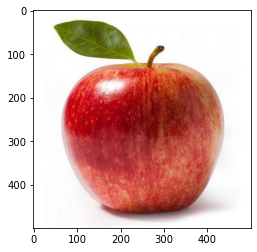

In [13]:
a = cv2.imread('apple.jpg')
a = cv2.cvtColor(a,cv2.COLOR_BGR2RGB)
plt.imshow(a)
plt.show()

In [14]:
print(a.shape)

(500, 500, 3)


In [15]:
a = a.reshape(1,500,500,3)
print(a.shape)

(1, 500, 500, 3)


### Rotation

In [16]:
datagen1 = ImageDataGenerator(rotation_range=30)
aug_iter1 = datagen1.flow(a)

In [28]:
# print(next(aug_iter1)[0])

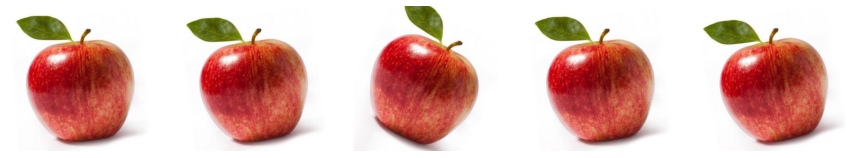

In [37]:
fig, ax = plt.subplots(1,5, figsize=(15,5))

for i in range(5):
    image = next(aug_iter1)[0].astype('int')
    ax[i].imshow(image)
    ax[i].axis('off')

### Random Shifts

In [38]:
datagen2 = ImageDataGenerator(width_shift_range=0.2, height_shift_range=0.2)
aug_iter2 = datagen2.flow(a)

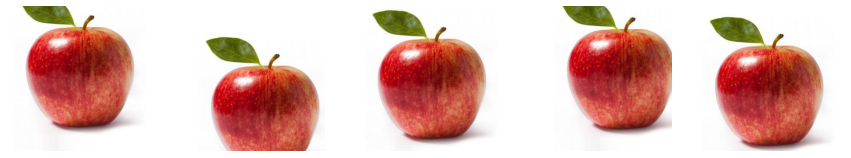

In [39]:
fig, ax = plt.subplots(1,5, figsize=(15,15))

for i in range(5):
    image = next(aug_iter2)[0].astype('int')
    ax[i].imshow(image)
    ax[i].axis('off')

### Random Flips

In [41]:
datagen3 = ImageDataGenerator(horizontal_flip=True, vertical_flip=True)
aug_iter3 = datagen3.flow(a)

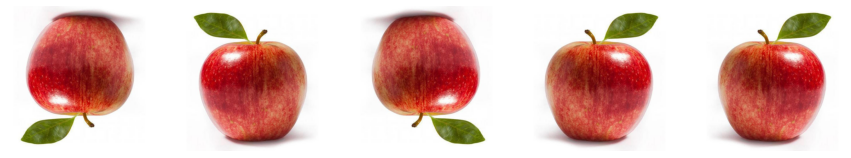

In [42]:
fig, ax = plt.subplots(1,5, figsize=(15,15))

for i in range(5):
    image = next(aug_iter3)[0].astype('int')
    ax[i].imshow(image)
    ax[i].axis('off')

### Brightness

In [49]:
datagen4 = ImageDataGenerator(brightness_range=[0.1,0.9])
aug_iter4 = datagen4.flow(a)

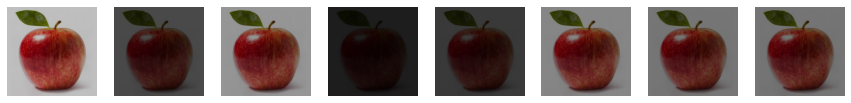

In [51]:
fig, ax = plt.subplots(1,8, figsize=(15,15))

for i in range(8):
    image = next(aug_iter4)[0].astype('int')
    ax[i].imshow(image)
    ax[i].axis('off')

### Zoom

In [59]:
# datagen5 = ImageDataGenerator(zoom_range=[0.1,0.3])
datagen5 = ImageDataGenerator(zoom_range=0.4)
aug_iter5 = datagen5.flow(a)

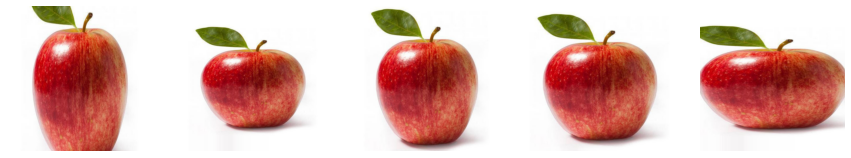

In [61]:
fig, ax = plt.subplots(1,5, figsize=(15,15))

for i in range(5):
    image = next(aug_iter5)[0].astype('int')
    ax[i].imshow(image)
    ax[i].axis('off')

### All augmentations

In [66]:
datagen6 = ImageDataGenerator(zoom_range=0.4,rotation_range=30,
                             width_shift_range=0.2, height_shift_range=0.2,
                             horizontal_flip=True, vertical_flip=True,
                             brightness_range=(0.1,0.4))
aug_iter6 = datagen6.flow(a)

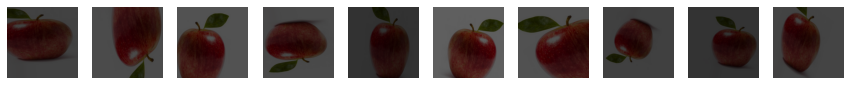

In [67]:
fig, ax = plt.subplots(1,10, figsize=(15,15))

for i in range(10):
    image = next(aug_iter6)[0].astype('int')
    ax[i].imshow(image)
    ax[i].axis('off')

### Terminologies

<b>1) Epoch</b><br>
One Epoch is when an ENTIRE dataset is passed forward and backward through the neural network only ONCE.

<b>Batch size</b><br>
Total number of training examples present in a single batch.
You can’t pass the entire dataset into the neural net at once. So, you divide dataset into Number of Batches or sets or groups.<br>

<b>Iterations</b> <br>
It is the number of batches needed to complete one epoch. One epoch includes all the training examples whereas one iteration includes only one batch of training examples.

epoch = batch size * number of iterations 

We can divide the dataset of 2000 examples into batches of 500 then it will take 4 iterations to complete 1 epoch.

<b>Steps per epoch</b><br>
Steps per epoch = Total_number_of_training_examples / batch_size.